In [1]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from statistics import mean
import math
import numpy as np

In [2]:
def preamble():
    print(' ')
    print('Principal Component Analysis')
    print('Patrick Humphries (pvhumphr@usc.edu)')
    print('University of Southern California')
    print('INF 552 Machine Learning for Data Science (32458)')
    print('Programming Assignment 3')
    print('Spring 202')
    print(' ')
    print('Due to the large amount of data that was provided')
    print('Please wait for the first graphic to display.')
    print('Canceling the current graphic will allow the next')
    print('graphic to be displayed.')

In [3]:
def plot_data_3d(D,F,title,labels):
    '''
    Yeah, I know, it is impossible to plot more than two dimensions.
    However, it is done with this function to get a high-level
    understandinf of the data in more than two dimensions.
    
    D:  Dimension Table.
    F:  Fact Table.
    title:  Title for the plot.
    labels:  A Boolean to show data points with or without labels.
    '''
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d', alpha=0.1)
    ax.set_title(title)
    
    for dimensions, fact in F.items():   
        
        x = dimensions[0]
        y = dimensions[1]
        z = dimensions[2]
        
        ax.scatter(x, y, z, color='b')
        
        if labels:
            ax.text(x, y, z, '%s' % (fact), size=8, zorder=1, color='k')

    dimension_names = list(D.keys())
    ax.set_xlabel(dimension_names[0])
    ax.set_ylabel(dimension_names[1])
    ax.set_zlabel(dimension_names[2])

    plt.show()

In [4]:
def center_facts_on_origin(D,F,verbose=False):
    '''
    Center the data and dimensions on the means of the Dimension Table.
    
    D:  Dimension Table.
    F:  Fact Table.
    verbose:  A flag indicating the spewing of messages.
    '''
    
    # Dimensions before the move.
    if verbose:
        print(' ')  
        print('============================')
        print('Center Fact table on origin.')
        print(' ')
        print('Dimensions before centering on origin.')
        for k, v in D.items():
            print(k, v)
        
    # M is the collection of mean values.
    M = {}
    for dimension, values in D.items():
        M[dimension] = round(mean(values), 1)
        
    # Reduce each dimension value by the mean.
    for dimension, values in D.items():
        for i in range(0,len(values)):
            D[dimension][i] -= M[dimension]
            D[dimension][i] = round(D[dimension][i], 1)
            
    # F prior to movement.
    if verbose:
        print(' ')
        print('Facts prior to centering on origin.')
        i = 0
        for k,v in F.items():
            print(v,k)
            i += 1
            if i > 6:
                break

    # Convert mean dictionary to a list.        
    mean_values = list(M.values())
    
    # Reduce each fact tuble by the mean.
    f_to_delete = []
    f_to_add = []
    for f in F:
        f_to_delete.append(f)
        f_as_list = list(f)
        for i in range(0, len(f_as_list)):
            f_as_list[i] -= mean_values[i]
            f_as_list[i] = round(f_as_list[i], 1)
        f_to_add.append(tuple(f_as_list))
        
    # Add facts with updated keys.
    for i in range(0,len(f_to_add)):
        F[f_to_add[i]] = F[f_to_delete[i]]
          
    # Delete facts with original keys.
    for f in f_to_delete:
        F.pop(f)
        
    # F after to movement.
    if verbose:
        print(' ')
        print('Facts after centering on origin.')
        i = 0
        for k,v in F.items():
            print(v,k) 
            if i > 6:
                break
            i += 1
      
    # The means.
    if verbose:
        print(' ')
        print('Mean values of dimensions:')
        for k, v in M.items():
            print(k, v)
        
    # Dimensions after the move.
    if verbose:
        print(' ')        
        print('Dimensions after centering on origin:')
        for k, v in D.items():
            print(k, v)
            
    return (D,F)
        

In [5]:
def calculate_variances(D):
    '''
    Create the Variances List.
    This function assumes D has been centered and the mean is 0.
    Numpy function is called for the purpose of software familiarization
    and documentation only.
    
    D:  Dimension Table.
    V:  Variance List.
    '''
    print(' ')
    print('==========')
    print('Variances:')
    print('\tCalculated\tnumpy.var')

    # Define a dictionary of variances with attribute as key.
    V = {}
    
    # Calculate the variance for each attribute.
    for attribute, values in D.items():
        temp_values = values.copy()
        
        # Square the values for the attribute.
        for i in range(len(temp_values)):
            temp_values[i] = temp_values[i] * temp_values[i]
        
        
        # Calculate the variance for an attribute.
        variance = sum(temp_values) / (len(temp_values) - 1)
        
        # Add the variance to the variances.
        V[attribute] = variance
        
    ddof = 1
        
    for attribute, variance in V.items():
        values = D[attribute]
        print(attribute + ':', round(variance,1), '\t\t', round(np.var(values, ddof=ddof), 3)  )
    
    return V

In [6]:
def calculate_covariances_numpy(D):
    '''
    Calculate the variances using a numpy function.  This is part
    of the software familiarization and is run for documentation
    only.
    
    D:  Dimension Table.
    '''
    
    # Create matrix with attributes as rows and columns as samples.
    print(' ')
    print('==================')
    print('Covariances numpy:')
    # Make a two-dimentional array of attribute rows and samples columns.
    a = []
    for samples in D.values():
        a.append(samples)
        
    # Create a matrix.
    data_matrix = np.matrix(a)
    
    # Calculate Covariances:
    covariances = np.cov(data_matrix)
    
    # Print Covariances Headings.
    headings = list(D.keys())
    s = ''
    for i in range(len(covariances)):
        s += '\t' + headings[i]
    print(s)
    
    # Print Covariance Rows.
    for i in range(len(covariances)):
        s = headings[i]
        for j in range(len(covariances[i])):
            s += '\t' + str(    round(covariances[i][j],1)      )
        print(s)

    return covariances, data_matrix


In [7]:
def calculate_covariances(D):
    '''
    This function assumes the Dimension Table has been 
    centered and the mean is 0.
    
    D:  Dimension Table.
    '''
    print(' ')
    print('=======================')
    print('Covariances calculated:')

    # Define a two dimensional list to hold products of attribute values.
    a = list(D.keys())
    n = len(a)
    
    covariances = [0] * n
    for i in range(n):
        covariances[i] = [0] * n
        
    i = 0
    for ai in a:
        j = 0
        for aj in a:
            sum_values = 0
            values1 = D[ai]
            values2 = D[aj]
            for k in range(len(values1)):
                sum_values += values1[k] * values2[k]
            covariance = sum_values / (len(values1) - 1)
            covariances[i][j] = round(covariance, 1)
            j += 1
        i += 1
            
    # Print Covariances Headings.
    headings = list(D.keys())
    s = ''
    for i in range(len(covariances)):
        s += '\t' + headings[i]
    print(s)
    
    # Print Covariance Rows.
    for i in range(len(covariances)):
        s = headings[i]
        for j in range(len(covariances[i])):
            s += '\t' + str(    round(covariances[i][j],1)      )
        print(s)

    return covariances


In [8]:
def calculate_correlations_numpy(D,V,M):
    '''
    The software package used for software familiarization and to
    verify the calculations made by this program is numpy.
    This function calculates correlations using numpy.  This
    function was for documentation only.
    
    D:  Dimension Table.
    V:  Variance List.
    M:  Data Matrix.
    '''
    print(' ')
    print('===================')
    print('Correlations numpy:')
    
    K = np.corrcoef(M)

    for i in range(len(K)):
        for j in range(len(K[i])):
            K[i][j] = round(K[i][j], 2)

    # Print Correlation Headings.
    headings = list(D.keys())
    s = ''
    for i in range(len(K)):
        s += '\t' + headings[i]
    print(s)
    
    # Print Correlation Rows.
    for i in range(len(K)):
        s = headings[i]
        for j in range(len(K[i])):
            s += '\t' + str(K[i][j])
        print(s)
        
    # Find the largest correlation:
    largest_correlation = 0
    largest_i = 0
    largest_j = 0
    for i in range(len(K)):
        for j in range(len(K)):
            if i == j:
                continue
            if K[i][j] > largest_correlation:
                largest_correlation = K[i][j]
                largest_i = i
                largest_j = j
    
    # Print largest correlation.
    headings = list(D.keys())
    x_label = headings[largest_i]
    y_label = headings[largest_j]
    print(' ')
    print('Largest Correlation (' + x_label + ', ' + y_label + '):', largest_correlation)
    
    # Get variance values.
    v = list(V.values())
    
    # Print results
    print('Corresponding Variances:', round(v[largest_i],1), round(v[largest_j],1))


In [9]:
def calculate_correlations(D,V,C):
    '''
    Given the the covariances and variances of the Fact table,
    calculate the correlation of all dimensions.  Find the two
    dimensions that have the highest correslation, and then 
    return the one with the least variance.  This is the dimension
    that will be ignored with the least loss of information.
    
    D:  Dimension Table.
    V:  Variances List.
    C:  Covariance Table.
    K:  Correlation Table.
    I:  Dimension to be ignored.
    '''
    print(' ')
    print('========================')
    print('Correlations calculated:')
    
    # Get variances
    v = list(V.values())
    
    # Get attributes.
    a = list(D.keys())
    n = len(a)
    
    # Create correlation two-dimensional list from covariance.
    K = [0] * n
    for i in range(n):
        K[i] = [0] * n
        
    # Calculate correlations.
    for i in range(n):
        for j in range(n):
            K[i][j] = C[i][j] / math.sqrt(v[i]*v[j])
                
    # Round the correlations.       
    for i in range(len(K)):
        for j in range(len(K[i])):
            K[i][j] = round(K[i][j], 2)

    # Print Correlation Headings.
    headings = list(D.keys())
    s = ''
    for i in range(len(K)):
        s += '\t' + headings[i]
    print(s)
    
    # Print Correlation Rows.
    for i in range(len(K)):
        s = headings[i]
        for j in range(len(K[i])):
            s += '\t' + str(K[i][j])
        print(s)
        
    # Find the largest correlation:
    largest_correlation = 0
    largest_i = 0
    largest_j = 0
    for i in range(len(K)):
        for j in range(len(K)):
            if i == j:
                continue
            if K[i][j] > largest_correlation:
                largest_correlation = K[i][j]
                largest_i = i
                largest_j = j
    
    # Print largest correlation.
    headings = list(D.keys())
    x_label = headings[largest_i]
    y_label = headings[largest_j]
    print(' ')
    print('Largest Correlation (' + x_label + ', ' + y_label + '):', largest_correlation)
    
    # Get variance values.
    v = list(V.values())
    
    # Print results
    print('Corresponding Variances:', round(v[largest_i],1), round(v[largest_j],1))
    
    # Select the attribute with the smaller variance to ignore.
    I = ''
    if v[largest_i] < v[largest_j]:
        I = x_label
    else:
        I = y_label
        
    print('Attribute to ignore based on variance:', I)
    
    return I
        

In [10]:
def reduce_dimensions(D,F):
    '''
    Of the two most correlated dimensions, remove the dimension 
    that has the least variance.  The remaining dimension, with
    the larger variance, will be better suited to show the distribution
    of data with the least loss of information.
    
    D:  Dimension Table.
    F:  Fact Table.
    C:  Covariance Table.
    I:  Dimension to be ignored.
    M:  Data Matrix from numpy.
    D1: The new Dimension Table.
    F1: The new Fact Table.
    '''
    print(' ')
    print('===================')
    print('Dimension Reduction')
    
    # Calculate variances.
    # V:  Variances list.
    V = calculate_variances(D)
        
    # Calculate covariances using numpy.
    # M:  Data Matrix
    # C:  Covariance two-dimensional list.
    C, M = calculate_covariances_numpy(D)
    
    # Calculate covariances.
    C = calculate_covariances(D)
    
    # I:  Attribute to ignore.
    I = calculate_correlations_numpy(D,V,M)
    I = calculate_correlations(D,V,C)
    
    # Remove that attribute from Fact table.
    a = list(D.keys())
    x = a.index(I)
    
    # Define the new Fact table.
    F1 = {}
    for attributes, value in F.items():
        if x == 0:
            new_attributes = (attributes[1],attributes[2])
        elif x == 1:
            new_attributes = (attributes[0],attributes[2])
        else:
            new_attributes = (attributes[0],attributes[1])
        F1[new_attributes] = value
    
    # Fact table before dimension reduction.
    print(' ')
    print('Fact table prior to dimension reduction.')
    print('Number of samples:', len(list(F.keys())))
    i = 0
    for k,v in F.items():
        print(v,k)  
        if i > 10:
            break
        i += 1

    # Fact table after dimension reduction.
    print(' ')
    print('Fact table after dimension reduction.')
    print('Number of samples:', len(list(F1.keys())))
    i = 0
    for k,v in F1.items():
        print(v,k)
        if i > 10:
            break
        i += 6

    # Create a new Dimension table.
    D1 = {}
    
    for attributes in list(F1.keys()):
        for k in range(len(attributes)):
            D1['Dim ' + str(k)] = []
        break
 
    for attributes in list(F1.keys()):
        for k in range(len(attributes)):
            D1['Dim ' + str(k)].append(attributes[k]) 
        
    return (D1,F1)

In [11]:
def plot_2d(D,F,title,labels):
    '''
    Plot the data in a two-dimensional Euclidean space with
    the regression line going through the origin.
    
    D:  Dimension Table.
    F:  Fact Table.
    title:  The title of the plot.
    labels:  Flag to indicate the labeling of the data points.
    '''
    print(' ')
    print('=======')
    print('Plot 2D')

    # Get dimension values and labels for plotting datapoints
    i = 0
    for dimension, values in D.items():
        if i == 0:
            x = values
            x_array = np.array(values)
            x_label = dimension
        elif i == 1:
            y = values
            y_array = np.array(values)
            y_label = dimension
        i += 1

    fig, ax = plt.subplots()
    
    # Render scatter plot.
    ax.scatter(x,y,alpha=0.2)
    
    # Add annotations.
    if labels:
        for fact_dimensions, fact_value in F.items():
            data_point = (fact_dimensions[0], fact_dimensions[1])
            label = fact_value
            plt.annotate(label, # This is the text.
                         (data_point), # This is the point to the label.
                         textcoords="offset points", # How to position text.
                         xytext=(0,10), # Distance of text from point.
                         ha="center") # Horizontal alignment of text.

    # Fit a line, forcing through origin.
    x_array = x_array[:,np.newaxis]
    a, _, _, _ = np.linalg.lstsq(x_array, y_array)
    plt.plot(x_array, a*x_array, 'r-')
    
    slope = a[0]
    angle_radians = math.atan(slope)
    angle = math.degrees(angle_radians)
    
    SVD = math.sqrt(0.34 * 0.34 + 1)
    print('slope:', round(slope,2), 'angle:', round(angle,1), 'SVD:', SVD)
    print
    
    # Add decorations.
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.grid(True)
        
    plt.show()
    
    return round(angle,1)

In [12]:
def create_F():
    '''
    This development data is based on the tutorial by Josh Starmer at StatQuest.
    The data consists of samples and attributes.
    Each sample contains values for each attribute.
    In the test data, the samples are "Mouse 1" through "Mouse 6".
    The attributes are "Gene 1" through "Gene 3".
    
    This array of data (samples by attributes) can be expressed as a
    multidimensional cube.  The attributes are dimensions.  The facts
    are the samples, each identified by a unique tuple of dimension values.
    
    The cube is known as a fact table identified as F.  Each fact in the
    Fact table is identified by a tuple of dimension values.  The tuple
    consists of a single dimension value.  A single fact is identified
    by F[(d1,d2,d3)].
    
    The collection of dimensions is identified by D.  It is a dictionary
    of dimension.  Each dimension is an array of dimension values.
    
    D:  Dimension Table.
    F:  Fact Table.
    '''
    print(' ')
    print('=================')
    print('Create Fact Table')

    # Define facts identified by dimension values.
    F = {}
    F[(10, 6, 12)] = "Sample 1"
    F[(11,4,9)] = "Sample 2"
    F[(8,5,10)] = "Sample 3"
    F[(3,3,2.5)] = "Sample 4"
    F[(2,2.8,1.3)] = "Sample 5"
    F[(1,1,2)] = "Sample 6"
    
    D = {}
    for attributes in list(F.keys()):
        for i in range(len(attributes)):
            D['Dim ' + str(i)] = []
        break
        
    for attributes in list(F.keys()):
        for i in range(len(attributes)):
            D['Dim ' + str(i)].append(attributes[i])
    
    # Dump dimensions and dimension values.
    print(' ')
    print('Dimensions:')
    for d in D:
        print(d, D[d])
    
    # Dump facts and associated dimension values.
    print(' ')
    print('Facts:')
    for f in F:
        print(F[f], f)
        
    return (D,F)

In [13]:
def load_F():
    '''
    Load the data from a file provided by the professor.
    The data is loaded into two data structures.
    The Fact table has rows equivalent to the rows in the file.
    The Dimension table has the attribute values by attribute type.
    
    F:  Fact table.
    D:  Dimension Table.
    '''
    print(' ')
    print('===== load_F() =====')
    F = {}
    
    # Load Fact table.
    rows = open("pca-data.txt", "r")
    
    i = 0
    for row in rows:
        
        row = row.strip()
        fields = row.split('\t')
        
        attribute_0 = float(fields[0])
        attribute_1 = float(fields[1])
        attribute_2 = float(fields[2])

        F[(attribute_0, attribute_1, attribute_2)] = 'Sample ' + str(i)
        i += 1
        
        if i > 1000000:
            break
    
    # Print Fact table.
    i = 0
    for attributes, value in F.items():
        print(value, 'attributes:', attributes)
        if i > 6:
            break
        i += 1
        
    print(' ')
    print('===== load_D() ====')
    
    D = {}
    for attributes in list(F.keys()):
        for i in range(len(attributes)):
            D['Dim ' + str(i)] = []
        break
        
    for attributes in list(F.keys()):
        for i in range(len(attributes)):
            D['Dim ' + str(i)].append(attributes[i])
    
    # Dump dimensions and dimension values.
    print(' ')
    print('Dimensions:')
    i = 0
    for attribute, values in D.items():
        s = attribute + '\tvalues:'
        for i in range(3):
            s += '\t' + str(values[i])
        print(s)
        
    
    return (D,F)

In [14]:
def development():
    '''
    This development function is based on the tutorial by Josh Starmer at StatQuest.
    This data was used to create this program and verify the results.
    The development function performs the following steps.
    1.  Create Fact and Dimension tables.
    2.  Plot the data.
    3.  Center the data in verbose mode.
    4.  Plot the data after centering.
    5.  Reduce dimensions.
    6.  Plot data in two dimensions with data points labeled.
    7.  Rotate the the data.
    8.  Plot the data again with the PC1 aligned horizontally.
    '''
    # Create a multidimensional fact table.
    D,F = create_F()

    # Plot data.
    title = 'Original data:'
    labels = True
    plot_data_3d(D,F,title,labels)

    # Center the facts on the orgin by subtracting the mean for a dimension
    # from each dimension value of the dimension.  This is done for each
    # dimention.
    verbose = True
    D,F = center_facts_on_origin(D,F,verbose)

    # Plot 3d data.
    title = 'Facts after centering on origin:'
    labels = True
    plot_data_3d(D,F,title,labels)

    # Reduce number of dimensions.
    # F1:  Fact table with an attribute removed.
    # D1:  Attribute list with an attribute removed.
    D,F = reduce_dimensions(D,F)

    # Plot the remaining data.
    title = 'Reduced Data'
    labels = True
    angle = plot_2d(D,F,title,labels)
    
    # Rotate PC1 to be horizontal.
    D,F = rotate_2d(D,F,angle)
    
    # Plot the rotated data.
    title = 'Rotated Data'
    labels = True
    angle = plot_2d(D,F,title,labels)
    


In [15]:
def production():
    '''
    The production function has the following steps.
    1.  Load the data provided by the instructor into Fact and Dimension tables.
    2.  Plot the data in three dimensions.
    3.  Center the data on the mean of each dimension.
    4.  Plot the data again after centering.
    5.  Reduce the number of dimensions.
    6.  Plot the data in two dimensions to determine PC1 angle.
    7.  Rotate the data to align PC1 horizontally.
    '''
    D,F = load_F()
    
    # Display identification.
    preamble()
    
    # Plot data.
    title = 'Original data:'
    labels = False
    plot_data_3d(D,F,title,labels)
    
    
    # Center the facts on the orgin by subtracting the mean for a dimension
    # from each dimension value of the dimension.  This is done for each
    # dimention.
    verbose = False
    D,F = center_facts_on_origin(D,F,verbose)

    # Plot 3d data.
    title = 'Facts after centering on origin:'
    labels = False
    plot_data_3d(D,F,title,labels)
    
    # Reduce number of dimensions.
    # F1:  Fact table with an attribute removed.
    # D1:  Attribute list with an attribute removed.
    D,F = reduce_dimensions(D,F)


    # Plot the remaining data.
    title = 'Reduced Data'
    labels = False
    angle = plot_2d(D,F,title,labels)
    

    # Rotate PC1 to be horizontal.
    D,F = rotate_2d(D,F,angle)
    
    # Plot the rotated data.
    title = 'Rotated Data'
    labels = False
    angle = plot_2d(D,F,title,labels)


In [16]:
def rotate_2d(D,F,angle):

    '''
    Rotate the Fact table (F1) and Dimensions (D1) by the angle.

    a**2 + b**2 = c**2
    a and b are the original coordinates.
    c is the hypotenuse of the original coordinates.
    
    a1 and b1 are the noew coordinates.
    c1 is the hypotenuse of the original coordinates.
    
    For verification, c1 chouls always equal c
    
    a1 = a * sine(A + angle) / sine(A)
    b1 = b * cosine(A + angle) / cosine(A)
    
    a:  Opposite side.
    b:  Adjacent side.
    c:  Hypotenuse.

    '''
    # F2:  Rotated graph.
    F2 = {}
    
    # Limit output.
    i = 0
    
    # Define knowns.  D is the change in radians.
    # Adjust angle to account for rounding.
    delta = math.radians(angle - 8)

    # Rotate graph and dimensions.
    for attributes, value in F.items():

        b = attributes[0]
        a = attributes[1]
        c = math.hypot(a,b)
        
        # Do all calculations as if in quadrant I (upper right).
        if a < 0:
            flip_a1 = True
            a = a * (-1)
        else:
            flip_a1 = False
            
        if b < 0:
            flip_b1 = True
            b = b * (-1)
        else:
            flip_b1 = False
        
        if c == 0:
            
            a1 = a
            b1 = b
            
        else:
        
            sin_A = a/c
            cos_A = b/c

            A = math.asin(sin_A)

            # Plus or minus depending on slope.
            A1 = A + delta

            sin_A1 = math.sin(A1)   

            if sin_A == 0:
                a1 = a
            else:
                a1 = a * sin_A1 / sin_A

            cos_A1 = math.cos(A1)

            if cos_A == 0:
                b1 = b
            else:
                b1 = b * cos_A1 / cos_A

        c1 = math.hypot(a1,b1)
        
        if flip_a1:
            a = a * (-1)
            a1 = a1 * (-1)
            
        if flip_b1:
            b = b * (-1)
            b1 = b1 * (-1)
        
        if i < 6:
            
            # Format the details.
            a_str = 'a\t' + str(a)
            b_str = 'b\t' + str(b)
            c_str = 'c\t' + str(round(c,1))
            
            sin_A_str = 'sin(A)' + str(round(sin_A, 2))
            cos_A_str = 'cos(A)' + str(round(cos_A,2))
            
            A_str = 'A\t' + str(A)
            A1_str = 'A1\t' + str(A1)
            
            sin_A1_str = 'sin(A1)' + str(round(sin_A1,2))
            cos_A1_str = 'cos(A1)' + str(round(cos_A1,2))

            a1_str = 'a1\t' + str(round(a1,1))
            b1_str = 'b1\t' + str(round(b1,1))
            c1_str = 'c1\t' + str(round(c1,1))
            
            A_degrees = 'A deg:  ' + str(round(math.degrees(A),1))
            delta_degrees = 'delta deg:  ' + str(round(math.degrees(delta),1))
            A1_degrees = 'A1 deg:  ' + str(round(math.degrees(A1),1))

            A_radians = 'A radians:  ' + str(round(A, 1))
            delta_radians = 'delta radians:  ' + str(round(delta, 1))
            A1_radians = 'A1 radians:  ' + str(round(A1, 1))

            
            # Print the details.
            print(' ')
            print(value)
            print(a_str)
            print(b_str)
            print(c_str)
        #     print(sin_A_str)
        #     print(cos_A_str)
        #     print(A_str)
        #     print(A1_str)
        #     print(sin_A1_str)
        #     print(cos_A1_str)
            print(a1_str)
            print(b1_str)
            print(c1_str)
            print(A_radians, delta_radians, A1_radians)
            print(A_degrees, delta_degrees, A1_degrees)
            print(sin_A_str, sin_A1_str, cos_A_str, cos_A1_str)
            i += 1
            
        # Create an updated Fact table.
        F2[(b1,a1)] = F[attributes]
        
    # Create a new Dimension table.
    D2 = {}
    
    for attributes in list(F2.keys()):
        for k in range(len(attributes)):
            D2['Dim ' + str(k)] = []
        break
 
    for attributes in list(F2.keys()):
        for k in range(len(attributes)):
            D2['Dim ' + str(k)].append(attributes[k])
    
    return (D2,F2)

 
===== load_F() =====
Sample 0 attributes: (5.906262853951832, -7.729464584682111, 9.144944874608196)
Sample 1 attributes: (-8.640323106971573, 1.7242604350569888, -10.696805187953952)
Sample 2 attributes: (0.25854061492215674, 0.23062223968214718, 0.7674391638194876)
Sample 3 attributes: (-5.234353794193943, 3.194685075162285, -1.8943847407605263)
Sample 4 attributes: (12.62286294146571, -3.5078877906880543, 4.086258338102421)
Sample 5 attributes: (0.7855670569156168, 3.007478450451627, 0.001893147740198886)
Sample 6 attributes: (-13.845236700686861, 6.07010837676231, -11.57755017004028)
Sample 7 attributes: (6.9171360524662875, -0.2068945076277069, 4.9105774925259835)
 
===== load_D() ====
 
Dimensions:
Dim 0	values:	5.906262853951832	-8.640323106971573	0.25854061492215674
Dim 1	values:	-7.729464584682111	1.7242604350569888	0.23062223968214718
Dim 2	values:	9.144944874608196	-10.696805187953952	0.7674391638194876
 
Principal Component Analysis
Patrick Humphries (pvhumphr@usc.edu)
Un

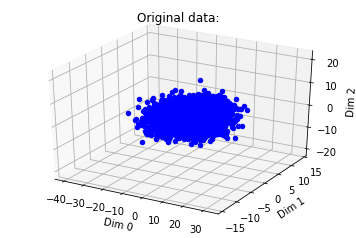

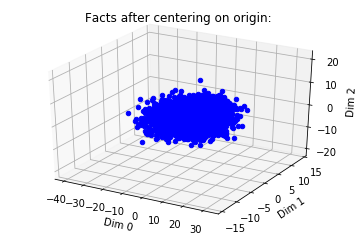

 
Dimension Reduction
 
Variances:
	Calculated	numpy.var
Dim 0: 81.2 		 81.24
Dim 1: 13.7 		 13.698
Dim 2: 31.4 		 31.365
 
Covariances numpy:
	Dim 0	Dim 1	Dim 2
Dim 0	81.2	-15.8	31.7
Dim 1	-15.8	13.7	-15.3
Dim 2	31.7	-15.3	31.4
 
Covariances calculated:
	Dim 0	Dim 1	Dim 2
Dim 0	81.2	-15.8	31.7
Dim 1	-15.8	13.7	-15.3
Dim 2	31.7	-15.3	31.4
 
Correlations numpy:
	Dim 0	Dim 1	Dim 2
Dim 0	1.0	-0.47	0.63
Dim 1	-0.47	1.0	-0.74
Dim 2	0.63	-0.74	1.0
 
Largest Correlation (Dim 0, Dim 2): 0.63
Corresponding Variances: 81.2 31.4
 
Correlations calculated:
	Dim 0	Dim 1	Dim 2
Dim 0	1.0	-0.47	0.63
Dim 1	-0.47	1.0	-0.74
Dim 2	0.63	-0.74	1.0
 
Largest Correlation (Dim 0, Dim 2): 0.63
Corresponding Variances: 81.2 31.4
Attribute to ignore based on variance: Dim 2
 
Fact table prior to dimension reduction.
Number of samples: 5995
Sample 0 (5.9, -7.7, 9.0)
Sample 1 (-8.6, 1.7, -10.8)
Sample 2 (0.3, 0.2, 0.7)
Sample 3 (-5.2, 3.2, -2.0)
Sample 4 (12.6, -3.5, 4.0)
Sample 5 (0.8, 3.0, -0.1)
Sample 6 (-13.8, 

C:\Users\Patrick\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


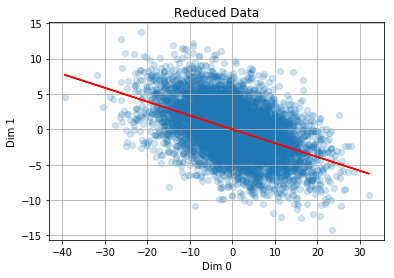

 
Sample 0
a	-7.7
b	5.9
c	9.7
a1	-5.4
b1	8.1
c1	9.7
A radians:  0.9 delta radians:  -0.3 A1 radians:  0.6
A deg:  52.5 delta deg:  -19.0 A1 deg:  33.5
sin(A)0.79 sin(A1)0.55 cos(A)0.61 cos(A1)0.83
 
Sample 1
a	1.7
b	-8.6
c	8.8
a1	-1.2
b1	-8.7
c1	8.8
A radians:  0.2 delta radians:  -0.3 A1 radians:  -0.1
A deg:  11.2 delta deg:  -19.0 A1 deg:  -7.8
sin(A)0.19 sin(A1)-0.14 cos(A)0.98 cos(A1)0.99
 
Sample 2
a	0.2
b	0.3
c	0.4
a1	0.1
b1	0.3
c1	0.4
A radians:  0.6 delta radians:  -0.3 A1 radians:  0.3
A deg:  33.7 delta deg:  -19.0 A1 deg:  14.7
sin(A)0.55 sin(A1)0.25 cos(A)0.83 cos(A1)0.97
 
Sample 3
a	3.2
b	-5.2
c	6.1
a1	1.3
b1	-6.0
c1	6.1
A radians:  0.6 delta radians:  -0.3 A1 radians:  0.2
A deg:  31.6 delta deg:  -19.0 A1 deg:  12.6
sin(A)0.52 sin(A1)0.22 cos(A)0.85 cos(A1)0.98
 
Sample 4
a	-3.5
b	12.6
c	13.1
a1	0.8
b1	13.1
c1	13.1
A radians:  0.3 delta radians:  -0.3 A1 radians:  -0.1
A deg:  15.5 delta deg:  -19.0 A1 deg:  -3.5
sin(A)0.27 sin(A1)-0.06 cos(A)0.96 cos(A1)1.0
 
Sample 5

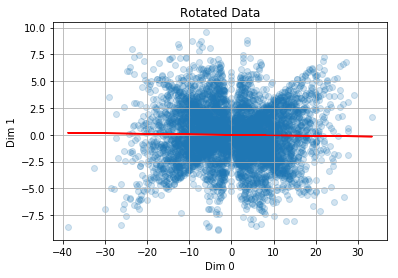

In [17]:
# Main
'''
This development function is based on the tutorial by Josh Starmer at StatQuest.
This data was used to create this program and verify the results.

The production function runs the program using data provided by professor.
'''
if False:
    development()
else:
    production()